# Iris Dataset - Clustering using K-means | GRIP Task 2 | June21 | DataScience
**From the given ‘Iris’ dataset, We are predicting the optimum number of clusters
and representing it visually.**


**Importing the Required Libraries**

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

**Loading the data set**

In [3]:
iris = load_iris()
print(iris)



{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

**Our Target Column/Values**

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Define target and predictors**


In [5]:
ir=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
ir['target']=pd.Series(iris.target)
ir['target_names']=pd.Series(iris.target_names)
species = []
for i in range(len(ir)):
    if ir.iloc[i]['target'] == 0:
        species.append('setosa')
    elif ir.iloc[i]['target'] == 1:
        species.append('versicolor')
    elif ir.iloc[i]['target'] == 2:
        species.append('virginica')
ir['Species'] = species

In [6]:
ir


,sepal length,sepal width,petal length,petal width,target,target_names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
5,5.4,3.9,1.7,0.4,0,NaN,setosa
6,4.6,3.4,1.4,0.3,0,NaN,setosa
7,5.0,3.4,1.5,0.2,0,NaN,setosa
8,4.4,2.9,1.4,0.2,0,NaN,setosa
9,4.9,3.1,1.5,0.1,0,NaN,setosa


# Visualizing Our Data

Text(0, 0.5, 'Sepal length')

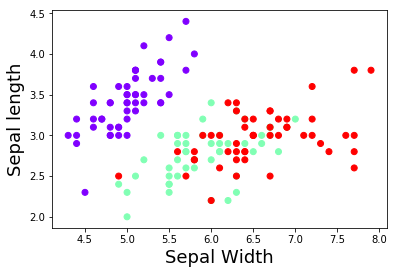

In [7]:
plt.scatter(x=ir['sepal length'], y=ir['sepal width'] ,c=iris.target, cmap='rainbow') 
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

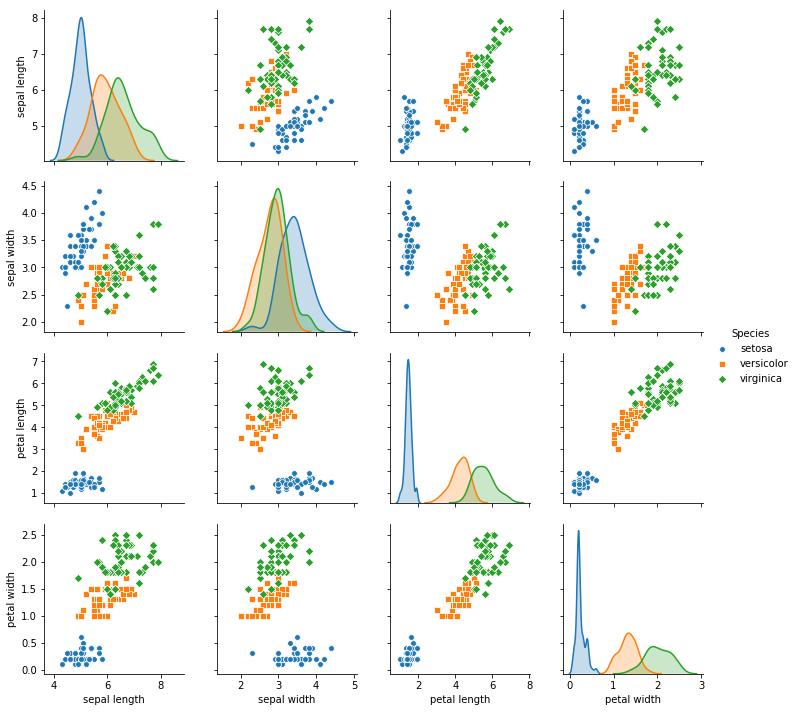

In [40]:
sns.pairplot(ir.drop(['target'],axis=1), hue='Species', height=2.5, markers = ["8","s","D"])

# Using the elbow method to estimate the value k
**The output graph of the Elbow method is shown below. Note that the shape of elbow is approximately formed at k=3
Plotting the results onto a line graph, allowing us to observe 'The elbow'**

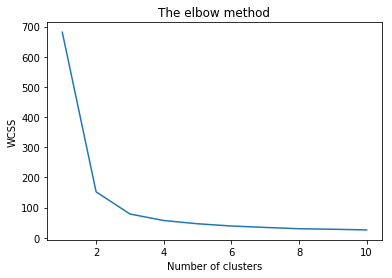

In [8]:
x = ir.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**Now,Instantiate and fit our K means cluster model. We are going to use three clusters.**


In [9]:
kmeans3 = KMeans(n_clusters=3, random_state=21) 
#n_jobs = 4, n_jobs' was deprecated in version 0.23 and will be
y = kmeans3.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


**Identifying the center points of the data.**

In [10]:
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

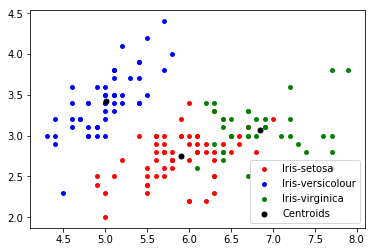

In [12]:
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 25, c = 'Black', label = 'Centroids')

plt.legend()

plt.show()

# Orignal Vs Predected


Text(0.5, 1.0, 'Predicted')

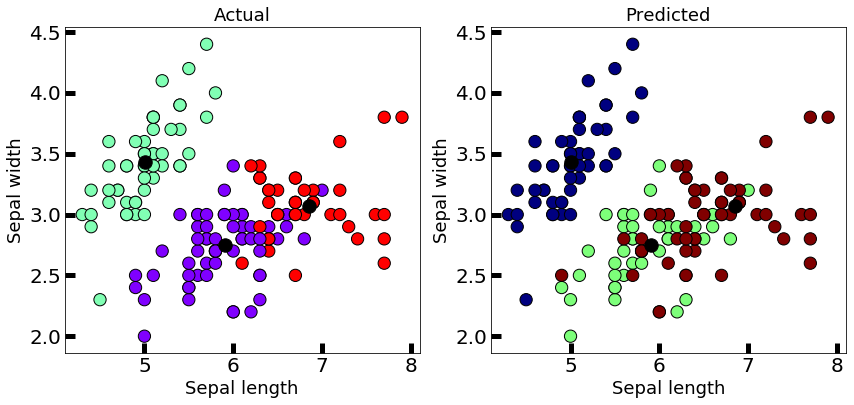

In [13]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=ir['sepal length'], y=ir['sepal width'], c=y, cmap='rainbow',edgecolor='k', s=150)
axes[1].scatter(x=ir['sepal length'], y=ir['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 180, c = 'Black', label = 'Centroids')
axes[1].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 180, c = 'Black', label = 'Centroids')
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [14]:
pd.crosstab(iris.target,y)

col_0,0,1,2
row_0,,,
0,0,50,0
1,48,0,2
2,14,0,36
